In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [3]:
def get_masses(dmsq_atm, sum_masses, hierarchy):
    p=zeros(3)
    if 'n' in hierarchy.lower():
        #Normal hierarchy:
        p[2] = sum_masses**2-dmsq_atm
        p[1] = -4*sum_masses
        p[0] = 3
        r = roots(p)
        m_minus = min(r)
        #print 'normal',r
    else:
        p[2] = 4*dmsq_atm-sum_masses**2
        p[1] = 2*sum_masses
        p[0] = 3
        r = roots(p)
        m_minus = max(r)
        #print 'inverted',r
    m_plus = sqrt(dmsq_atm+m_minus**2)
    return m_minus, m_plus

In [4]:
def get_masses(dmsq_atm, sum_masses, hierarchy):
    if 'n' in hierarchy.lower():
        #Normal hierarchy:
        r = np.roots([3,-4*sum_masses,sum_masses**2-dmsq_atm])
        m_minus = min(r)
    else:
        r = np.roots([3,2*sum_masses,4*dmsq_atm-sum_masses**2])
        m_minus = max(r)
    return m_minus, np.sqrt(dmsq_atm+m_minus**2)

In [6]:
[mm, mp] = get_masses(2e-3, 0.1, 'NH')
print(mm, mp, 2*mm+mp)

[mm, mp] = get_masses(2e-3, 0.1, 'IH')
print(mm, mp, mm+2*mp)

0.02450296453108829 0.05099407093782345 0.10000000000000003
0.008830368802245065 0.045584815598877476 0.10000000000000002


In [7]:
sum_masses = 0.09
dmsq_atm = 2e-3
commonsettings = {'N_ur':0,'N_ncdm':2,'output':'mPk','P_k_max_1/Mpc':3.0}

In [8]:
[mm, mp] = get_masses(dmsq_atm, sum_masses, 'NH')
NH = Class()
NH.set(commonsettings)
NH.set({'m_ncdm':str(mm)+','+str(mp),'deg_ncdm':'2,1'})
NH.compute()

In [9]:
[mm, mp] = get_masses(dmsq_atm, sum_masses, 'IH')
IH = Class()
IH.set(commonsettings)
IH.set({'m_ncdm':str(mm)+','+str(mp),'deg_ncdm':'1,2'})
IH.compute()

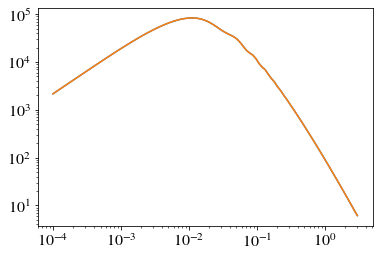

In [10]:
kvec = np.logspace(-4,np.log10(3),100)
pkNH = []
pkIH = []
for k in kvec:
    pkNH.append(NH.pk(k,0.))
    pkIH.append(IH.pk(k,0.))


plt.loglog(kvec,pkNH,kvec,pkIH)

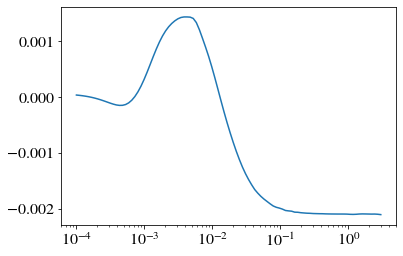

In [11]:
plt.semilogx(kvec,1-np.array(pkNH)/np.array(pkIH))

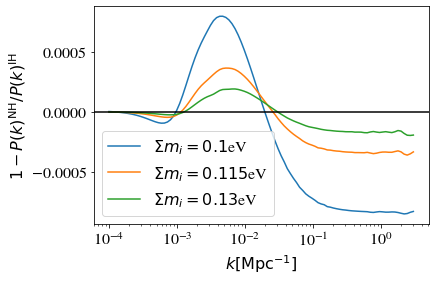

In [14]:
dmsq_atm = 2e-3
commonsettings = {'N_ur':0,'N_ncdm':2,'output':'mPk','P_k_max_1/Mpc':3.0,
                  'ncdm_fluid_approximation':3}
kvec = np.logspace(-4,np.log10(3),100)
legarray = []
for sum_masses in [0.1, 0.115, 0.13]:
    [mm, mp] = get_masses(dmsq_atm, sum_masses, 'NH')
    NH = Class()
    NH.set(commonsettings)
    NH.set({'m_ncdm':str(mm)+','+str(mp),'deg_ncdm':'2,1'})
    NH.compute()
    [mm, mp] = get_masses(dmsq_atm, sum_masses, 'IH')
    IH = Class()
    IH.set(commonsettings)
    IH.set({'m_ncdm':str(mm)+','+str(mp),'deg_ncdm':'1,2'})
    IH.compute()
    pkNH = []
    pkIH = []
    for k in kvec:
        pkNH.append(NH.pk(k,0.))
        pkIH.append(IH.pk(k,0.))
    plt.semilogx(kvec,1-np.array(pkNH)/np.array(pkIH))
    legarray.append(r'$\Sigma m_i = '+str(sum_masses)+'$eV')
    
plt.axhline(0,color='k')
plt.xlabel(r'$k [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$1-P(k)^\mathrm{NH}/P(k)^\mathrm{IH}$')
plt.legend(legarray)